In [2]:
# Wikimedia metrics

In [3]:
import json
from pathlib import Path
import arrow
import requests

from collections import defaultdict

In [4]:
datadir = Path('sample_wikimedia_pageviews_data/')
sample_resp = datadir / 'sample_ukraine_pageviews_resp.json'
resp = json.load(open(sample_resp))
wm_ts_items = resp['items']

In [5]:
def parse_wikimedia_timestamp(timestamp):
    assert len(timestamp) == 10, 'expecting YYYYMMDDHH datetime string'
    # cuts off hours suffix (HH)
    return timestamp[:-2]

In [6]:
def datetime_to_aylien_str(dt):
    """
    Convert python datetime object to the string format
    used by Aylien newsAPI
    """
    
    dt_str = dt.isoformat().split('+')[0]
    if 'T' not in dt_str:
        dt_str = f'{dt_str}T00:00:00.0'
    dt_str = f'{dt_str}Z'

    return dt_str

In [13]:
def wikimedia_ts_to_aylien_ts(wikimedia_ts_items):
    ts_columns = defaultdict(list)
    for entry in wikimedia_ts_items:
        col_name = f'{entry["project"]}-{entry["article"]}-pageviews'
        dt = datetime_to_aylien_str(
            arrow.get(parse_wikimedia_timestamp(entry["timestamp"])).datetime)
        ts_columns[col_name].append(
            {
                'date': dt,
                col_name: entry['views']
            }
        )
    return ts_columns

In [14]:
raw_column_data = wikimedia_ts_to_aylien_ts(wm_ts_items)

In [17]:
import pandas as pd

In [20]:
def ts_records_to_ts_df(ts_records, ts_field='date'):
    df = pd.DataFrame(ts_records)
    index_col = f'datetime-{ts_field}'
    df[index_col] = pd.to_datetime(df[ts_field])
    df.set_index(index_col, inplace=True)
    return df

In [21]:
ts_dfs = [ts_records_to_ts_df(recs) for _, recs in raw_column_data.items()]

In [24]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='datetime-date'>

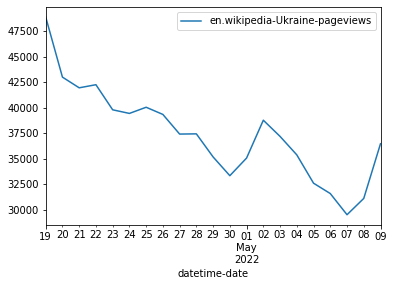

In [25]:
ts_dfs[0].plot()

In [12]:
print(json.dumps(raw_column_data, indent=2))

{
  "en.wikipedia-Ukraine-pageviews": [
    {
      "date": "2022-04-19T00:00:00Z",
      "count": 48916
    },
    {
      "date": "2022-04-20T00:00:00Z",
      "count": 43014
    },
    {
      "date": "2022-04-21T00:00:00Z",
      "count": 41964
    },
    {
      "date": "2022-04-22T00:00:00Z",
      "count": 42269
    },
    {
      "date": "2022-04-23T00:00:00Z",
      "count": 39804
    },
    {
      "date": "2022-04-24T00:00:00Z",
      "count": 39448
    },
    {
      "date": "2022-04-25T00:00:00Z",
      "count": 40054
    },
    {
      "date": "2022-04-26T00:00:00Z",
      "count": 39348
    },
    {
      "date": "2022-04-27T00:00:00Z",
      "count": 37419
    },
    {
      "date": "2022-04-28T00:00:00Z",
      "count": 37441
    },
    {
      "date": "2022-04-29T00:00:00Z",
      "count": 35173
    },
    {
      "date": "2022-04-30T00:00:00Z",
      "count": 33331
    },
    {
      "date": "2022-05-01T00:00:00Z",
      "count": 35064
    },
    {
      "date": "202

In [ ]:
entries

In [ ]:
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Ukraine/daily/2022041900/2022050900
    
https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=GameStop|Bitcoin
    

datetime_to_aylien_str(arrow.get(date).shift(days=-1).datetime)

'start_date': arrow.get(query_template['published_at.start']).datetime,


wikimedia timestampFormat: 'YYYYMMDD00',
 https://github.com/MusikAnimal/pageviews/blob/3426d27c46ac2f3a683e26e0bdeb873166fb45cd/javascripts/redirectviews/config.js
 
 